<a href="https://colab.research.google.com/github/anish-maddipatla/Portfolio-Optimization-Fama-French/blob/main/SAPM_Portfolio_Optimisation(Anish%2BNanda).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#THIS prog is for calculating the daily portfolio returns and other values

In [ ]:
!pip install yf
import yfinance as yf

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Creating an array of stocks for the portfolio
stockSymbols=['RVNL.NS', 'NHPC.NS', 'IRFC.NS', 'ONGC.NS', 'IREDA.NS']

In [ ]:
stockStartDate='2024-01-01'
today=datetime.today().strftime('%Y-%m-%d')
today='2025-01-01'
print(today)

2025-01-01


In [ ]:
#Display the number of assets in portfolio
numAssets=len(stockSymbols)
print('You have '+ str(numAssets) +' stocks in your portfolio' )

You have 5 stocks in your portfolio


In [ ]:
def getMyPortfolio(stocks=stockSymbols,start=stockStartDate,end=today):
  data_main=yf.download(stocks,start,end)
  data=data_main['Close']
  return data

In [ ]:
my_stocks=getMyPortfolio(stockSymbols)
print(my_stocks)

[*********************100%***********************]  5 of 5 completed

Ticker        IREDA.NS     IRFC.NS    NHPC.NS     ONGC.NS     RVNL.NS
Date                                                                 
2024-01-01  104.650002   99.467903  63.592640  192.194260  181.294403
2024-01-02  103.500000   99.071617  65.371109  193.785355  180.099060
2024-01-03  101.800003   99.963264  64.746246  194.908478  184.581604
2024-01-04  104.400002  100.359550  66.380524  200.898453  184.780838
2024-01-05  105.099998   99.814651  69.168411  202.583130  183.934113
...                ...         ...        ...         ...         ...
2024-12-24  200.970001  147.860001  80.499802  234.285736  428.549988
2024-12-26  199.179993  146.889999  80.489990  235.560364  427.700012
2024-12-27  196.940002  146.220001  78.812302  232.275757  425.549988
2024-12-30  218.470001  153.350006  78.243256  228.108704  408.299988
2024-12-31  215.250000  149.039993  79.165497  234.579880  422.700012

[246 rows x 5 columns]


In [ ]:
def showGraph(my_stocks):
  ##TITLE
  title="Porfolio Adj Price history"

  ##Give fig size
  plt.figure(figsize=(12.5,4.5))
  ##Loop through and plot the price
  for c in my_stocks.columns:
    plt.plot(my_stocks[c],label=c)
    plt.title(title)
    plt.ylabel('Adj closing price')
    plt.xlabel('Time')
    plt.legend(my_stocks.columns.values,loc="upper left")
    plt.show

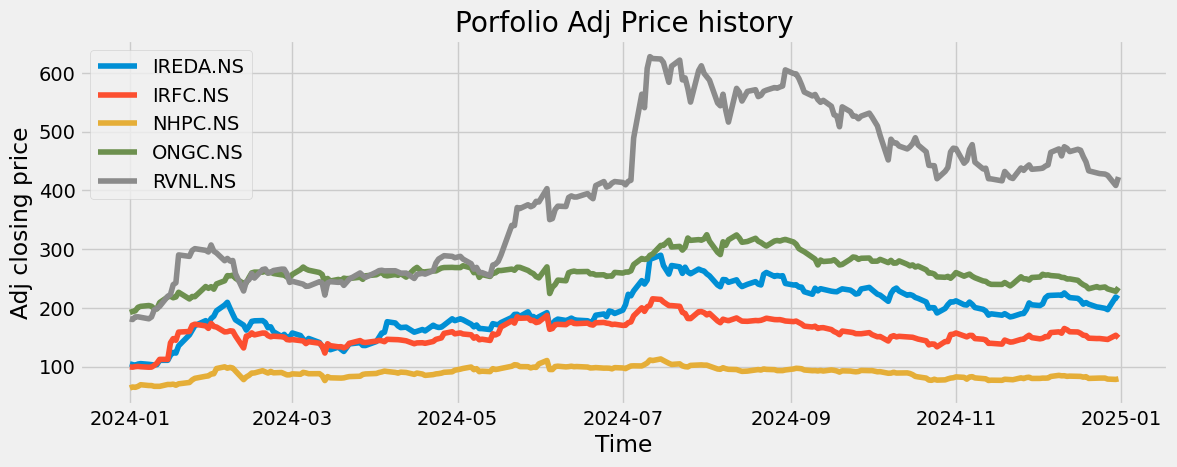

In [ ]:
showGraph(my_stocks)

In [ ]:
#Daily returns
daily_simple_returns=my_stocks.pct_change(1)
daily_simple_returns

Ticker,IREDA.NS,IRFC.NS,NHPC.NS,ONGC.NS,RVNL.NS
Date,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN
2024-01-02,-0.010989,-0.003984,0.027967,0.008279,-0.006593
2024-01-03,-0.016425,0.009000,-0.009559,0.005796,0.024889
2024-01-04,0.025540,0.003964,0.025241,0.030732,0.001079
2024-01-05,0.006705,-0.005429,0.041999,0.008386,-0.004582
...,...,...,...,...,...
2024-12-24,-0.003076,0.000474,0.000244,-0.007889,-0.002444
2024-12-26,-0.008907,-0.006560,-0.000122,0.005440,-0.001983
2024-12-27,-0.011246,-0.004561,-0.020843,-0.013944,-0.005027


In [ ]:
#showing correlation
daily_simple_returns.corr()

Ticker,IREDA.NS,IRFC.NS,NHPC.NS,ONGC.NS,RVNL.NS
Ticker,,,,,
IREDA.NS,1.000000,0.562557,0.505203,0.354616,0.487152
IRFC.NS,0.562557,1.000000,0.561382,0.387607,0.703481
NHPC.NS,0.505203,0.561382,1.000000,0.527634,0.515921
ONGC.NS,0.354616,0.387607,0.527634,1.000000,0.433095
RVNL.NS,0.487152,0.703481,0.515921,0.433095,1.000000


In [ ]:
#covariance matrix for daily returns
daily_simple_returns.cov()

Ticker,IREDA.NS,IRFC.NS,NHPC.NS,ONGC.NS,RVNL.NS
Ticker,,,,,
IREDA.NS,0.001310,0.000727,0.000504,0.000302,0.000702
IRFC.NS,0.000727,0.001273,0.000552,0.000325,0.000999
NHPC.NS,0.000504,0.000552,0.000759,0.000342,0.000565
ONGC.NS,0.000302,0.000325,0.000342,0.000553,0.000405
RVNL.NS,0.000702,0.000999,0.000565,0.000405,0.001583


In [ ]:
#variance
daily_simple_returns.var()

,0
Ticker,
IREDA.NS,0.001310
IRFC.NS,0.001273
NHPC.NS,0.000759
ONGC.NS,0.000553
RVNL.NS,0.001583


In [ ]:
#stock volatility
print("The stock volatility is : ")
daily_simple_returns.std()

The stock volatility is : 


,0
Ticker,
IREDA.NS,0.036201
IRFC.NS,0.035677
NHPC.NS,0.027542
ONGC.NS,0.023526
RVNL.NS,0.039787


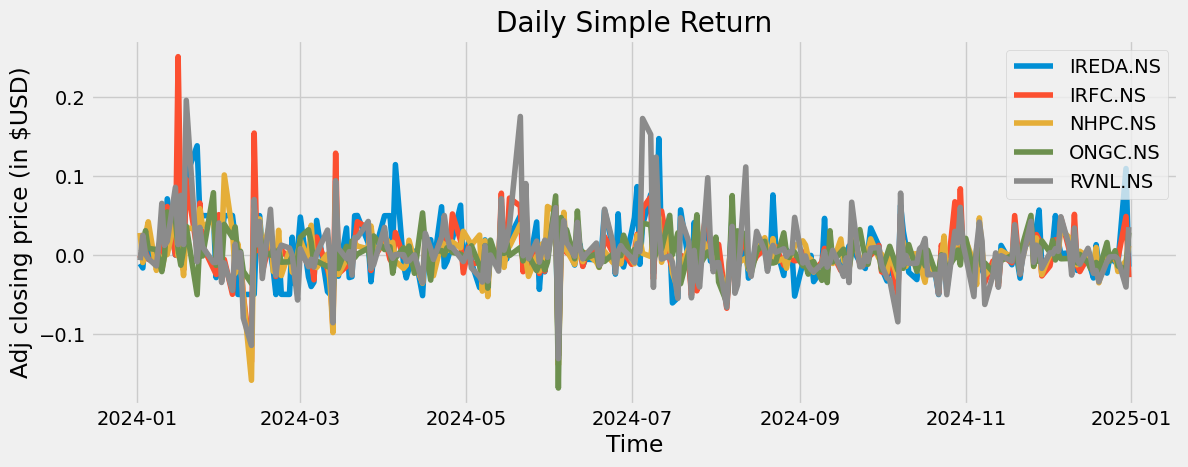

In [ ]:
#visualise the daily simple
plt.figure(figsize=(12.5,4.5))
title1='Daily Simple Return'
for c in daily_simple_returns.columns:

  plt.plot(daily_simple_returns[c],label=c)

  plt.title(title1)
  plt.ylabel('Adj closing price (in $USD)')
  plt.xlabel('Time')
  plt.legend(daily_simple_returns.columns.values,loc="upper right")
  plt.show

In [ ]:
#mean of daily simple returns
daily_simple_returns_mean=daily_simple_returns.mean()

In [ ]:
###If we want random weights
random_weights=np.random.rand(5)
print(random_weights)

[0.24731777 0.90820199 0.79309012 0.97589605 0.92228677]


In [ ]:
#Equal Weights
randomWeight=np.array([0.20,0.20,0.20,0.20,0.20])

In [ ]:
#total portfolio returns
total_returns=np.sum(daily_simple_returns.mean() * randomWeight)
total_annualised=total_returns*253

print("The expected portfolio value is "+str(total_returns))
print("The expected annualised returns is "+str(total_annualised))

The expected portfolio value is 0.002490447189982174
The expected annualised returns is 0.63008313906549


In [ ]:
dailycumsimplereturns= (daily_simple_returns+1).cumprod()
dailycumsimplereturns

Ticker,IREDA.NS,IRFC.NS,NHPC.NS,ONGC.NS,RVNL.NS
Date,,,,,
2024-01-01,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.989011,0.996016,1.027967,1.008279,0.993407
2024-01-03,0.972766,1.004980,1.018141,1.014122,1.018132
2024-01-04,0.997611,1.008964,1.043840,1.045289,1.019231
2024-01-05,1.004300,1.003486,1.087680,1.054054,1.014560
...,...,...,...,...,...
2024-12-24,1.920401,1.486510,1.265867,1.219005,2.363835
2024-12-26,1.903297,1.476758,1.265712,1.225637,2.359146
2024-12-27,1.881892,1.470022,1.239331,1.208547,2.347287


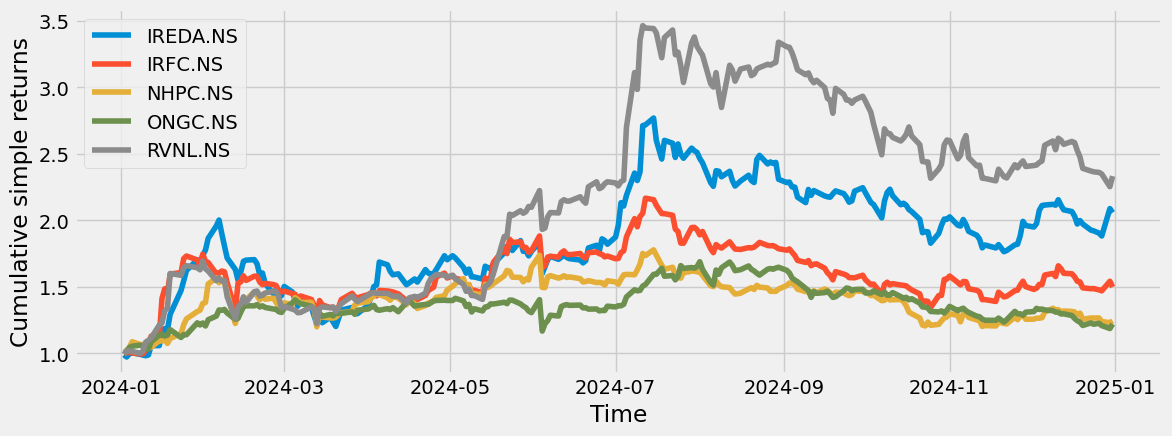

In [ ]:
plt.figure(figsize=(12.5,4.5))
title2='Cumulative simple returns'
for c in dailycumsimplereturns.columns:
  plt.plot(dailycumsimplereturns[c],label=c)
plt.xlabel('Time')
plt.ylabel('Cumulative simple returns')
plt.legend(dailycumsimplereturns.columns.values,loc="upper left")
plt.show()

In [ ]:
cov_matrix_annual=daily_simple_returns.cov()*252
cov_matrix_annual

Ticker,IREDA.NS,IRFC.NS,NHPC.NS,ONGC.NS,RVNL.NS
Ticker,,,,,
IREDA.NS,0.330241,0.183090,0.126933,0.076106,0.176814
IRFC.NS,0.183090,0.320749,0.139006,0.081982,0.251635
NHPC.NS,0.126933,0.139006,0.191154,0.086153,0.142466
ONGC.NS,0.076106,0.081982,0.086153,0.139472,0.102156
RVNL.NS,0.176814,0.251635,0.142466,0.102156,0.398908


In [ ]:
#this is the portfolio variance
port_variance=np.dot(randomWeight.T,np.dot(cov_matrix_annual,randomWeight))
port_variance

0.16452817130314346

In [ ]:
#Calculating the portfolio volatility
port_volatility=np.sqrt(port_variance)
port_volatility

0.40562072346361133

In [ ]:
#Show the expected annual return , colatility(risk) and variance

percent_var=str(round(port_variance,2)*100)+"%"
percent_vol=str(round(port_volatility,2)*100)+"%"
percent_ret=str(round(total_annualised,2)*100)+"%"

print("Expected variance is "+ percent_var)
print("Expected volatility/risk is "+ percent_vol)
print("Expected annual return is "+ percent_ret)

Expected variance is 16.0%
Expected volatility/risk is 41.0%
Expected annual return is 63.0%


In [ ]:
!pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

With Short Selling (Minimum Variance Portfolio):
Weights: {'IREDA.NS': '9.79%', 'IRFC.NS': '8.28%', 'NHPC.NS': '24.32%', 'ONGC.NS': '62.43%', 'RVNL.NS': '-4.82%'}
Expected Return: 28.69%
Volatility (Risk): 34.26%
Sharpe Ratio: 0.65

Without Short Selling (Minimum Variance Portfolio):
Weights: {'IREDA.NS': '9.40%', 'IRFC.NS': '5.33%', 'NHPC.NS': '23.78%', 'ONGC.NS': '61.49%', 'RVNL.NS': '0.00%'}
Expected Return: 33.08%
Volatility (Risk): 34.32%
Sharpe Ratio: 0.77

With Short Selling (Tangency Portfolio):
Weights: {'IREDA.NS': '97.58%', 'IRFC.NS': '-62.51%', 'NHPC.NS': '-41.74%', 'ONGC.NS': '6.67%', 'RVNL.NS': '100.00%'}
Expected Return: 204.90%
Volatility (Risk): 73.61%
Sharpe Ratio: 2.70

Without Short Selling (Tangency Portfolio):
Weights: {'IREDA.NS': '41.28%', 'IRFC.NS': '0.00%', 'NHPC.NS': '0.00%', 'ONGC.NS': '0.00%', 'RVNL.NS': '58.72%'}
Expected Return: 126.94%
Volatility (Risk): 52.87%
Sharpe Ratio: 2.28



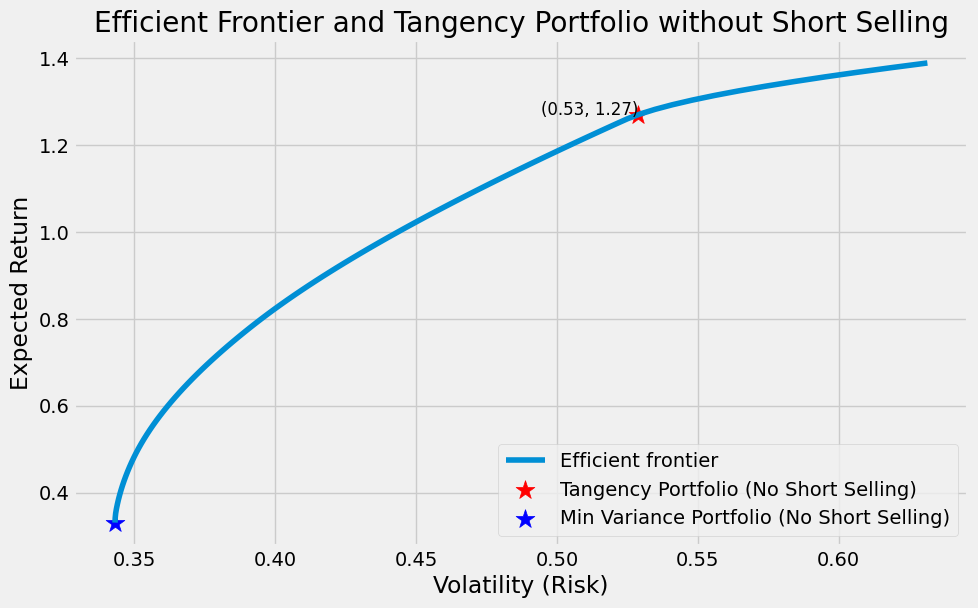

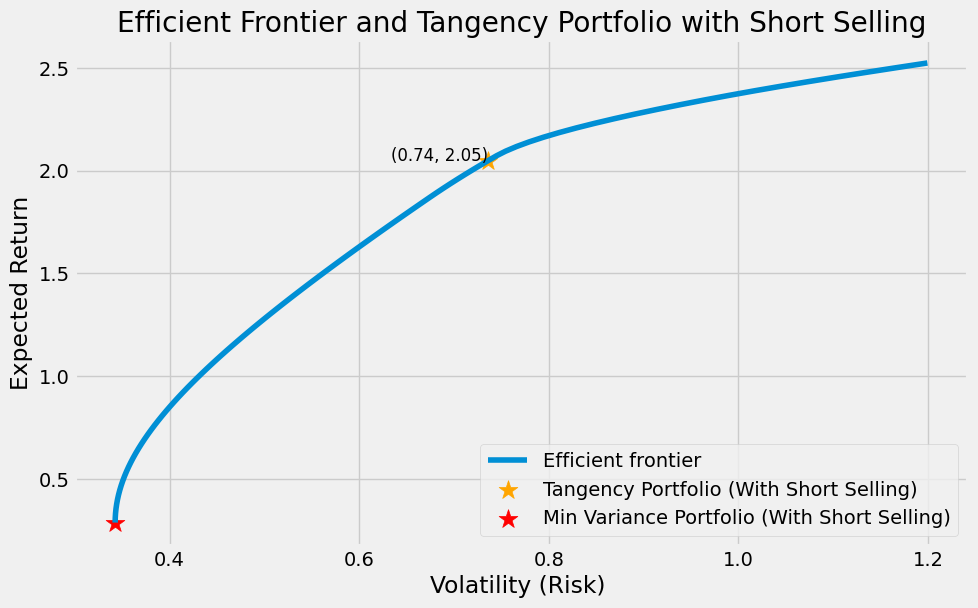

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pypfopt import EfficientFrontier, risk_models, expected_returns, plotting

# Step 1: Load your stock data and calculate expected returns and covariance matrix
mu = expected_returns.mean_historical_return(my_stocks)
S = risk_models.sample_cov(my_stocks)
risk_free_rate = 0.065  # 6.5% risk-free rate

# Step 2: Optimize the portfolio for both with and without short selling

# With short selling allowed (weight_bounds=(-1, 1))
ef_short = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
weights_short = ef_short.max_sharpe(risk_free_rate=risk_free_rate)  # Tangency portfolio (max Sharpe ratio)
cleaned_weights_short = ef_short.clean_weights()  # Clean the weights for readability
ret_short, vol_short, sharpe_short = ef_short.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)

# Without short selling allowed (weight_bounds=(0, 1))
ef_no_short = EfficientFrontier(mu, S)
weights_no_short = ef_no_short.max_sharpe(risk_free_rate=risk_free_rate)  # Tangency portfolio (max Sharpe ratio)
cleaned_weights_no_short = ef_no_short.clean_weights()  # Clean the weights for readability
ret_no_short, vol_no_short, sharpe_no_short = ef_no_short.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)

# Formatting the output of weights and performance as percentages
cleaned_weights_short_percent = {k: f"{v*100:.2f}%" for k, v in cleaned_weights_short.items()}
cleaned_weights_no_short_percent = {k: f"{v*100:.2f}%" for k, v in cleaned_weights_no_short.items()}

# Convert returns and volatility to percentage
ret_short_percent = f"{ret_short * 100:.2f}%"
vol_short_percent = f"{vol_short * 100:.2f}%"
sharpe_short_value = sharpe_short

ret_no_short_percent = f"{ret_no_short * 100:.2f}%"
vol_no_short_percent = f"{vol_no_short * 100:.2f}%"
sharpe_no_short_value = sharpe_no_short

# Step 2.1: Optimize the portfolio for minimum variance without short selling
ef_min_var_no_short = EfficientFrontier(mu, S, weight_bounds=(0, 1))
weights_min_var_no_short = ef_min_var_no_short.min_volatility()  # Minimum variance portfolio
cleaned_weights_min_var_no_short = ef_min_var_no_short.clean_weights()  # Clean the weights for readability
ret_min_var_no_short, vol_min_var_no_short, sharpe_min_var_no_short = ef_min_var_no_short.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)

# Formatting the output of weights and performance as percentages
cleaned_weights_min_var_no_short_percent = {k: f"{v*100:.2f}%" for k, v in cleaned_weights_min_var_no_short.items()}
ret_min_var_no_short_percent = f"{ret_min_var_no_short * 100:.2f}%"
vol_min_var_no_short_percent = f"{vol_min_var_no_short * 100:.2f}%"
sharpe_min_var_no_short_value = sharpe_min_var_no_short

# Step 2.2: Optimize the portfolio for minimum variance with short selling allowed
ef_min_var_short = EfficientFrontier(mu, S, weight_bounds=(-1, 1))
weights_min_var_short = ef_min_var_short.min_volatility()  # Minimum variance portfolio
cleaned_weights_min_var_short = ef_min_var_short.clean_weights()  # Clean the weights for readability
ret_min_var_short, vol_min_var_short, sharpe_min_var_short = ef_min_var_short.portfolio_performance(verbose=False, risk_free_rate=risk_free_rate)

# Formatting the output of weights and performance as percentages
cleaned_weights_min_var_short_percent = {k: f"{v*100:.2f}%" for k, v in cleaned_weights_min_var_short.items()}
ret_min_var_short_percent = f"{ret_min_var_short * 100:.2f}%"
vol_min_var_short_percent = f"{vol_min_var_short * 100:.2f}%"
sharpe_min_var_short_value = sharpe_min_var_short

# Print results for the minimum variance portfolio with short selling
print("With Short Selling (Minimum Variance Portfolio):")
print("Weights:", cleaned_weights_min_var_short_percent)
print(f"Expected Return: {ret_min_var_short_percent}")
print(f"Volatility (Risk): {vol_min_var_short_percent}")
print(f"Sharpe Ratio: {sharpe_min_var_short_value:.2f}\n")

# Print results for the minimum variance portfolio without short selling
print("Without Short Selling (Minimum Variance Portfolio):")
print("Weights:", cleaned_weights_min_var_no_short_percent)
print(f"Expected Return: {ret_min_var_no_short_percent}")
print(f"Volatility (Risk): {vol_min_var_no_short_percent}")
print(f"Sharpe Ratio: {sharpe_min_var_no_short_value:.2f}\n")

# Print the results for the tangency portfolios
print("With Short Selling (Tangency Portfolio):")
print("Weights:", cleaned_weights_short_percent)
print(f"Expected Return: {ret_short_percent}")
print(f"Volatility (Risk): {vol_short_percent}")
print(f"Sharpe Ratio: {sharpe_short_value:.2f}\n")

print("Without Short Selling (Tangency Portfolio):")
print("Weights:", cleaned_weights_no_short_percent)
print(f"Expected Return: {ret_no_short_percent}")
print(f"Volatility (Risk): {vol_no_short_percent}")
print(f"Sharpe Ratio: {sharpe_no_short_value:.2f}\n")

# Step 3: Plot the efficient frontier without short selling

fig, ax = plt.subplots(figsize=(10, 6))

# Create a new EfficientFrontier instance for plotting without short selling
ef_no_short_plot = EfficientFrontier(mu, S)  # New instance for plotting

# Plotting efficient frontier (without short selling)
plotting.plot_efficient_frontier(ef_no_short_plot, ax=ax, show_assets=False, label="Efficient Frontier (No Short Selling)") # Use the new instance

# Marking the tangency portfolio (without short selling)
plt.scatter(vol_no_short, ret_no_short, marker="*", color="r", s=200, label="Tangency Portfolio (No Short Selling)")
# Marking the minimum variance portfolio (without short selling)
plt.scatter(vol_min_var_no_short, ret_min_var_no_short, marker="*", color="b", s=200, label="Min Variance Portfolio (No Short Selling)")

# Display coordinates of the tangency portfolio on the plot
plt.text(vol_no_short, ret_no_short, f"({vol_no_short:.2f}, {ret_no_short:.2f})", fontsize=12, ha='right')

# Adding labels and legend
plt.title("Efficient Frontier and Tangency Portfolio without Short Selling")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Step 4: Plot the efficient frontier with short selling

fig, ax = plt.subplots(figsize=(10, 6))

# Create a new EfficientFrontier instance for plotting with short selling
ef_short_plot = EfficientFrontier(mu, S, weight_bounds=(-1, 1))  # New instance for plotting

# Plotting efficient frontier (with short selling)
plotting.plot_efficient_frontier(ef_short_plot, ax=ax, show_assets=False, label="Efficient Frontier (With Short Selling)", color='green')  # Use the new instance

# Marking the tangency portfolio (with short selling)
plt.scatter(vol_short, ret_short, marker="*", color="orange", s=200, label="Tangency Portfolio (With Short Selling)")
# Marking the min variance portfolio (with short selling)
plt.scatter(vol_min_var_short, ret_min_var_short, marker="*", color="red", s=200, label="Min Variance Portfolio (With Short Selling)")

# Display coordinates of the tangency portfolio on the plot
plt.text(vol_short, ret_short, f"({vol_short:.2f}, {ret_short:.2f})", fontsize=12, ha='right')

# Adding labels and legend
plt.title("Efficient Frontier and Tangency Portfolio with Short Selling")
plt.xlabel("Volatility (Risk) ")
plt.ylabel("Expected Return")
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  1 of 1 completed


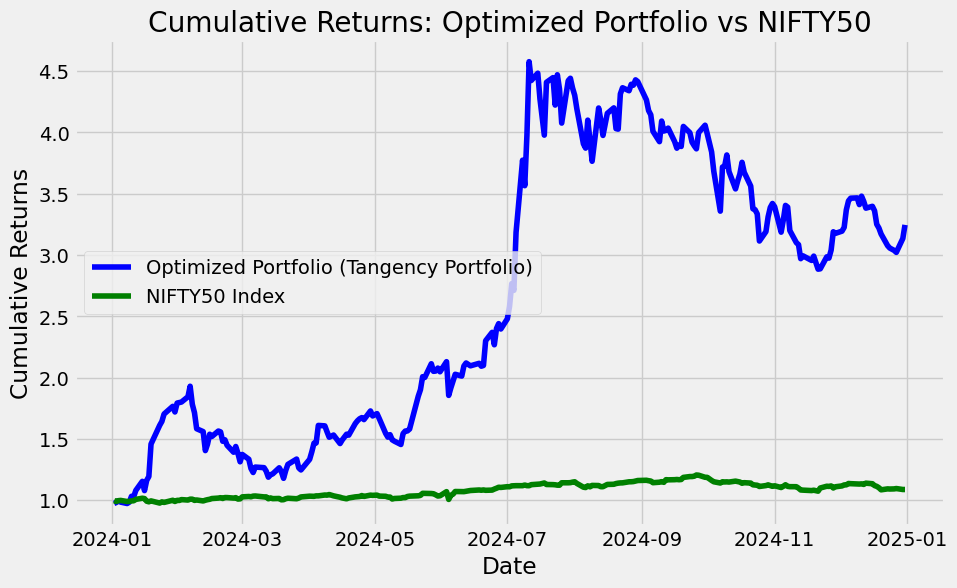

In [ ]:
portfolio_data = yf.download(stockSymbols,start=stockStartDate, end=today)['Close']
nifty50_data = yf.download('^NSEI', start=stockStartDate, end=today)['Close']  # Download NIFTY50 data

#Calculate daily returns for portfolio and NIFTY50
portfolio_returns = portfolio_data.pct_change().dropna()


# Calculate weighted portfolio returns (for Tangency Portfolio)
weights = cleaned_weights_short  # Assuming we want to use the short-selling tangency portfolio
portfolio_weighted_returns = (portfolio_returns * list(weights.values())).sum(axis=1)

nifty50_returns = nifty50_data.pct_change().dropna()

#Cumulative returns for portfolio and NIFTY50
portfolio_cumulative_returns = (1 + portfolio_weighted_returns).cumprod()
nifty50_cumulative_returns = (1 + nifty50_returns).cumprod()

#Plot the cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(portfolio_cumulative_returns, label="Optimized Portfolio (Tangency Portfolio)", color='blue')
plt.plot(nifty50_cumulative_returns, label="NIFTY50 Index", color='green')
plt.title("Cumulative Returns: Optimized Portfolio vs NIFTY50")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()